Load dataset

In [1]:
import pandas as pd
df = pd.read_parquet(r'C:\Users\USER\Downloads\RecruitmentMLTest-main\RecruitmentMLTest-main\data\orders.parquet')

df.info() # check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927651 entries, 0 to 3927650
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            object        
 1   created_at    datetime64[ns]
 2   sales_amount  float64       
 3   customer_id   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 119.9+ MB


Handle missing values

In [2]:
df.isnull().sum()

id              0
created_at      0
sales_amount    0
customer_id     0
dtype: int64

In [3]:
df #see overall data

,id,created_at,sales_amount,customer_id
0,29503467,2024-12-30 19:24:05,3.45,2937655
1,29511871,2024-12-30 22:09:52,3.45,1865364
2,29517274,2024-12-31 08:30:45,3.45,896267
3,29561364,2024-12-31 16:35:49,3.45,4077636
4,29562591,2024-12-31 16:50:58,3.45,124644
...,...,...,...,...
3927646,27928752,2024-12-10 13:53:24,193.50,653550
3927647,27909951,2024-12-10 11:36:44,196.58,1226518
3927648,27548578,2024-12-04 20:57:12,202.50,257115
3927649,27914829,2024-12-10 12:24:02,202.54,2957369


Analyze the time span of the data

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])
print(f"Date range: {df['created_at'].min()} to {df['created_at'].max()}")


Date range: 2024-01-01 06:10:16 to 2024-12-31 23:51:17


Visualize order patterns

Let's check by doing quarterly order, then breakdown to mothly and weekly to see the significant changes.

C:\Users\USER\AppData\Local\Temp\ipykernel_4620\811118784.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_orders = df.set_index('created_at').resample('Q')['id'].count()


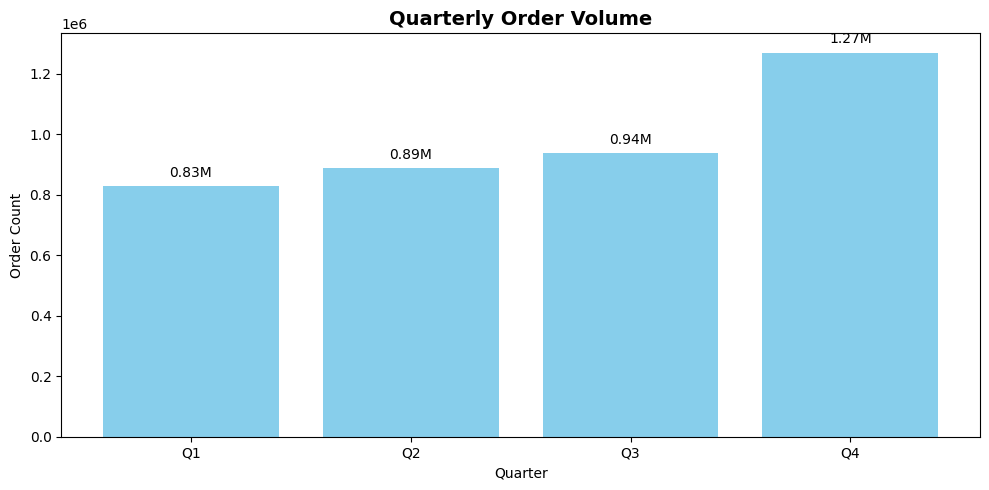

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by quarter (resample)
quarterly_orders = df.set_index('created_at').resample('Q')['id'].count()

# Assign quarter labels
quarter_labels = [f"Q{i+1}" for i in range(len(quarterly_orders))]

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(quarter_labels, quarterly_orders.values, color='skyblue')

# Add value labels on bars
for i, val in enumerate(quarterly_orders.values):
    plt.text(i, val + 20000, f"{val/1e6:.2f}M", ha='center', va='bottom', fontsize=10)

plt.title("Quarterly Order Volume", fontsize=14, fontweight='bold')
plt.xlabel("Quarter")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4620\2497132956.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df.set_index('created_at').resample('M')['id'].count()


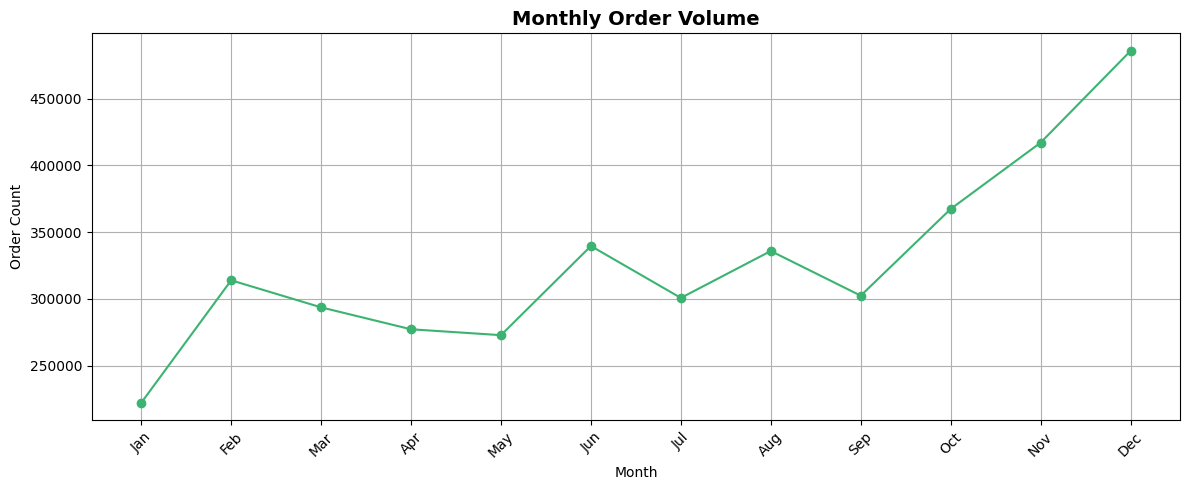

In [6]:
# Group by month
monthly_orders = df.set_index('created_at').resample('M')['id'].count()

# Format x-axis labels to month
month_labels = monthly_orders.index.strftime('%b')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(month_labels, monthly_orders.values, marker='o', linestyle='-', color='mediumseagreen')

# Formatting
plt.title("Monthly Order Volume", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

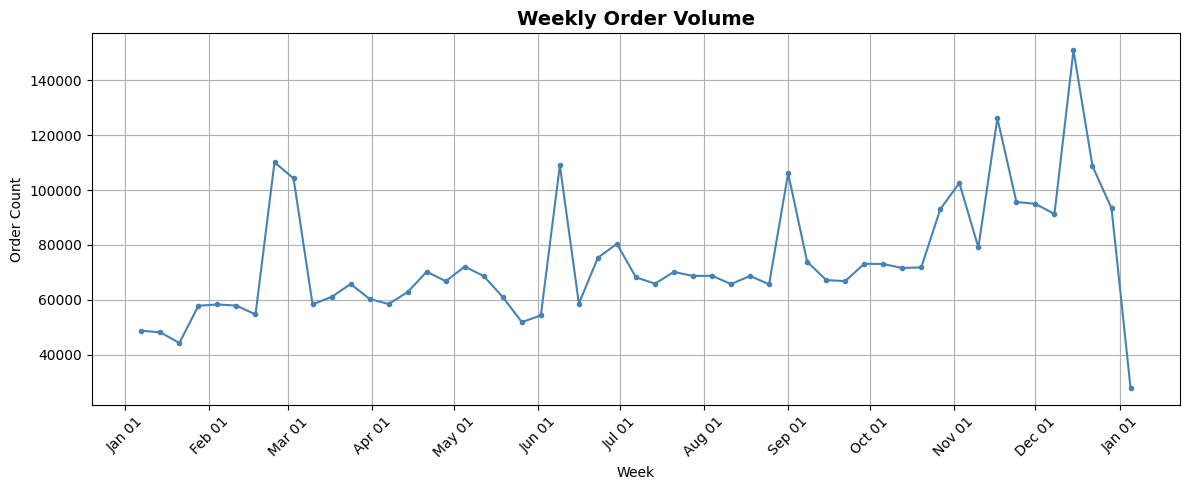

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Group by week
weekly_orders = df.set_index('created_at').resample('W')['id'].count()

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(weekly_orders.index, weekly_orders.values, marker='.', linestyle='-', color='steelblue')

# Formatting
ax.set_title("Weekly Order Volume", fontsize=14, fontweight='bold')
ax.set_xlabel("Week")
ax.set_ylabel("Order Count")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # one tick per month
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Observe which day of week has the highest sales 

C:\Users\USER\AppData\Local\Temp\ipykernel_4620\2745355332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_orders.index, y=day_orders.values, palette='viridis')


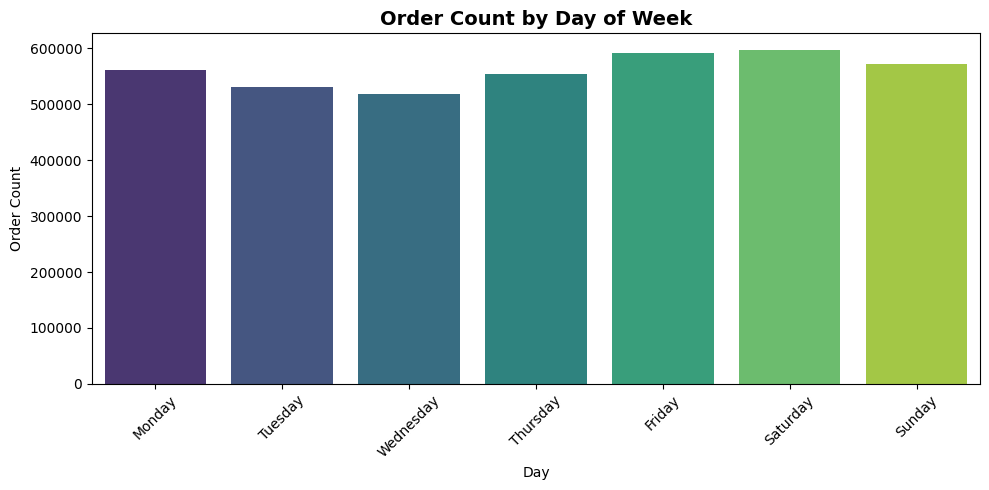

In [8]:
# Extract day of week
df['day_of_week'] = df['created_at'].dt.day_name()

# Count orders by day
day_orders = df.groupby('day_of_week')['id'].count().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=day_orders.index, y=day_orders.values, palette='viridis')

plt.title("Order Count by Day of Week", fontsize=14, fontweight='bold')
plt.xlabel("Day")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observe when is the peak hour where orders were created

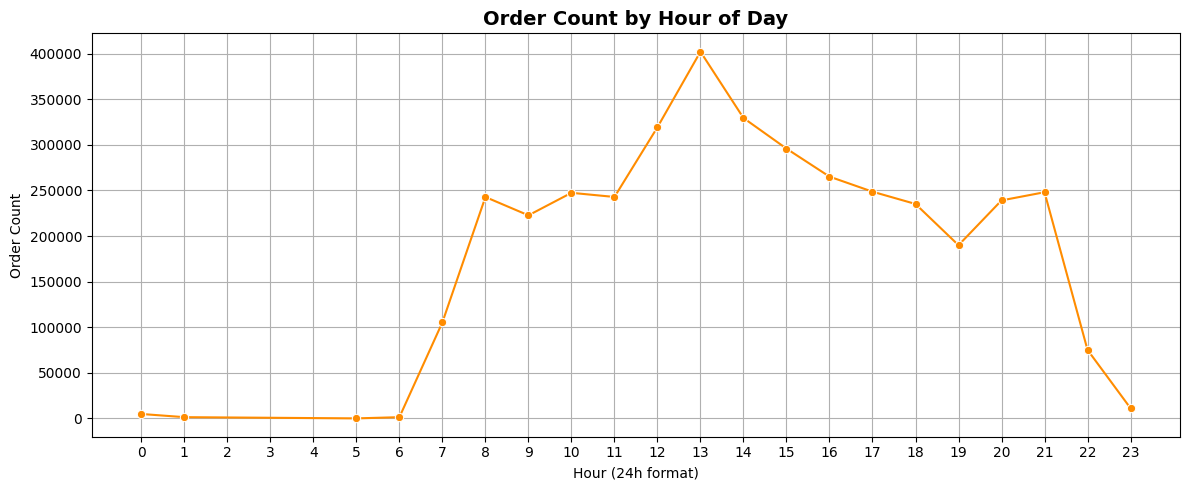

In [9]:
# Extract hour from timestamp
df['hour'] = df['created_at'].dt.hour

# Count orders by hour
hourly_orders = df.groupby('hour')['id'].count()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker='o', color='darkorange')

plt.title("Order Count by Hour of Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour (24h format)")
plt.ylabel("Order Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


Since we knew that usually highest peak order will be at 1300 and mostly from Friday. Let's dive dive into heatmap to look for overall peak hours for orders came in. 

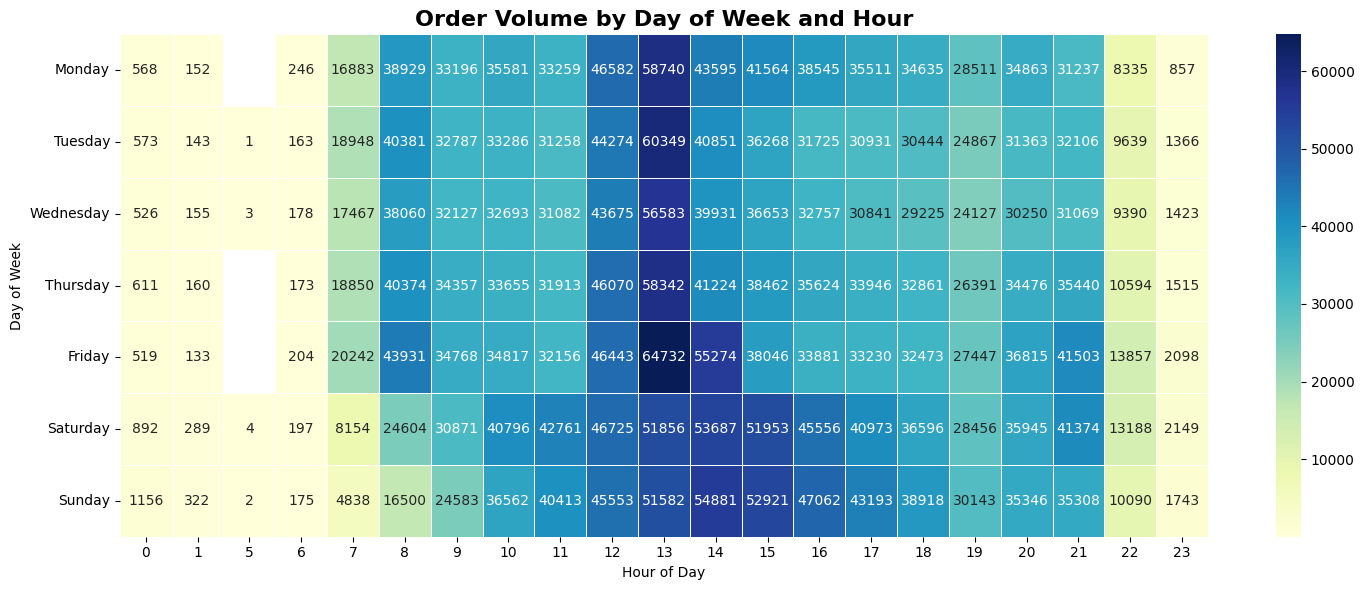

In [10]:
# Create pivot table
heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='id', aggfunc='count')

# Reorder rows to start from Monday
heatmap_data = heatmap_data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='.0f')

plt.title("Order Volume by Day of Week and Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

It is clearly that the deeper colour in the middle(12pm-3pm) is the peak hours where the orders came in.

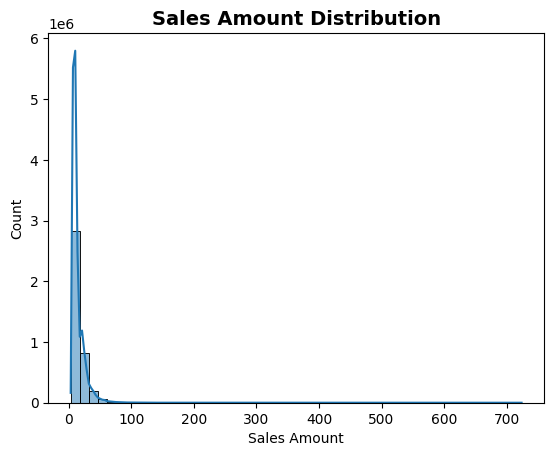

In [11]:
sns.histplot(df['sales_amount'], bins=50, kde=True)
plt.title('Sales Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sales Amount')
plt.show()

Apply log transformtion for better data distribution

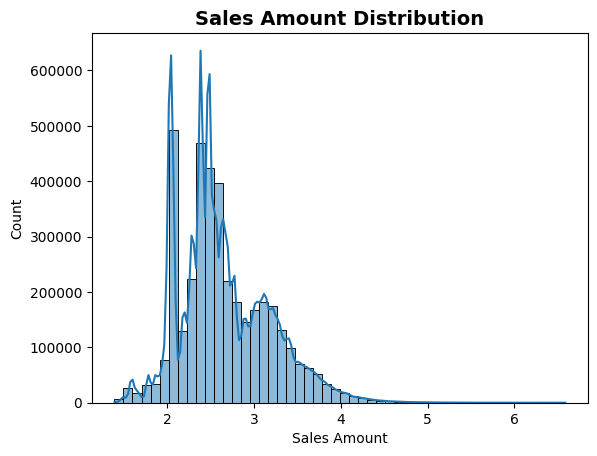

In [12]:
import numpy as np

log_sales = df['sales_amount'].apply(lambda x: np.log1p(x))

sns.histplot(log_sales, bins=50, kde=True)
plt.title('Sales Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sales Amount')
plt.show()


## Feature Engineering 

Transform the order-level data into customer-level RFM features

In [13]:
from datetime import timedelta

# Reference date = 1 day after max order
snapshot_date = df['created_at'].max() + timedelta(days=1)

# RFM metrics
rfm = df.groupby('customer_id').agg({
    'created_at': lambda x: (snapshot_date - x.max()).days, #check recent dates
    'id': 'count',
    'sales_amount': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,customer_id,Recency,Frequency,Monetary
0,1000015,18,4,158.11
1,100002,46,20,334.03
2,1000020,68,6,52.10
3,1000029,4,55,838.79
4,1000035,16,8,125.11


In [14]:
rfm.shape

(730485, 4)

Standardise the RFM for clustering

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


Perform KMeans Clustering use MiniBatch (for faster processing)
- did resample for the dataset due to overhlemed data (730485), long conmputational hours to train
- K Means were perfomed to find the best nunber of clusters. 

In [16]:
from sklearn.utils import resample
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# resample for fast tuning
sample_rfm_scaled = resample(rfm_scaled, n_samples=75000, random_state=42)

sse, silhouette_scores = [], []

for k in range(2, 10):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    kmeans.fit(sample_rfm_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(sample_rfm_scaled, kmeans.labels_))


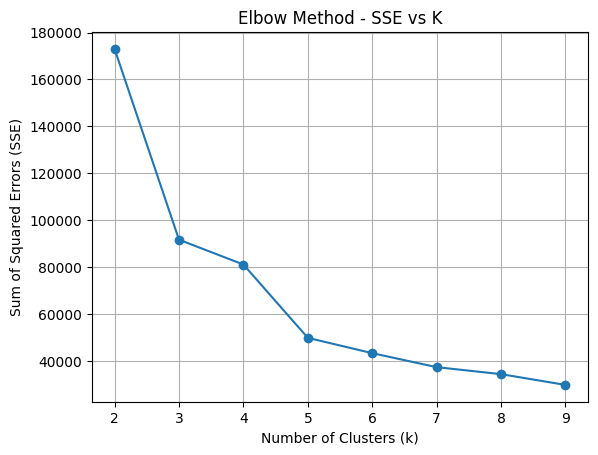

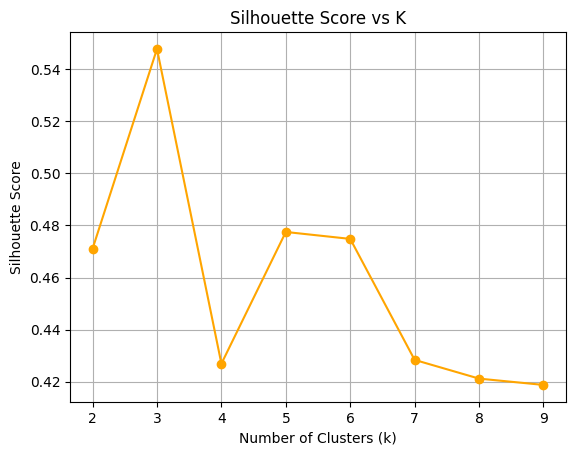

In [17]:
# Elbow Plot
plt.plot(range(2, 10), sse, marker='o')
plt.title("Elbow Method - SSE vs K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()

# Silhouette Score Plot
plt.plot(range(2, 10), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

For Elbow Method Analysis, there's a clear inflection point at k = 3
After k = 3, the SSE reduction slows significantly
This suggests that 3 clusters captures the majority of variance efficiently.

For Silhouette Score Analysis, peak silhouette score at k = 3 (around 0.55) , which is the highest of all tested values.

You can observe that scores drop significantly for k > 3, This suggests best intra-cluster cohesion and inter-cluster separation at k = 3.

Based on the both analysis above, then final cluster we chose were k=3 . 

In [18]:
best_k = 3
final_model = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=10000)
final_model.fit(sample_rfm_scaled)

rfm['Cluster'] = final_model.predict(rfm_scaled)


Cluster Summary
- aggregate the result and groupby using mean function to observe the average result of the clusters( for analysing characteristic purpose)

In [19]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'Customer Count'}).round(1)

cluster_summary


,Recency,Frequency,Monetary,Customer Count
Cluster,,,,
0,250.7,1.8,30.0,262023
1,49.1,5.4,84.7,451774
2,12.8,61.3,884.2,16688


After we observe the charactersitic, we can implement a simple logic to categorise them into different groups.

Lower Recency = More Recent Purchases

Higher Frequency = More Repeating Sales

Higher Monetary = Higher Value Purchased

In [26]:
segment_map = {
    0:'Normal Customer',          # High recency, low freq & monetary
    1:'Loyal Customers',   # Mid recency, decent freq & spend
    2:'Champion Customer'        # Low recency, high freq & monetary
}

rfm['Segment'] = rfm['Cluster'].map(segment_map)


C:\Users\USER\AppData\Local\Temp\ipykernel_4620\2751953722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')


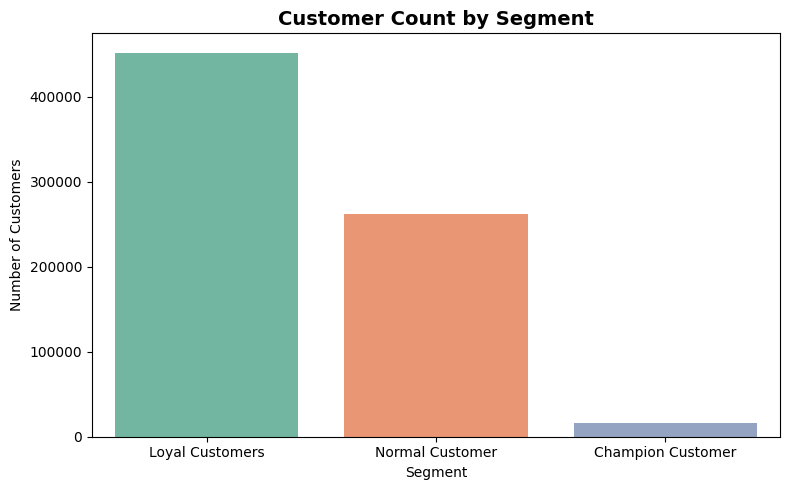

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of segment size
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')

plt.title("Customer Count by Segment", fontsize=14, fontweight='bold')
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


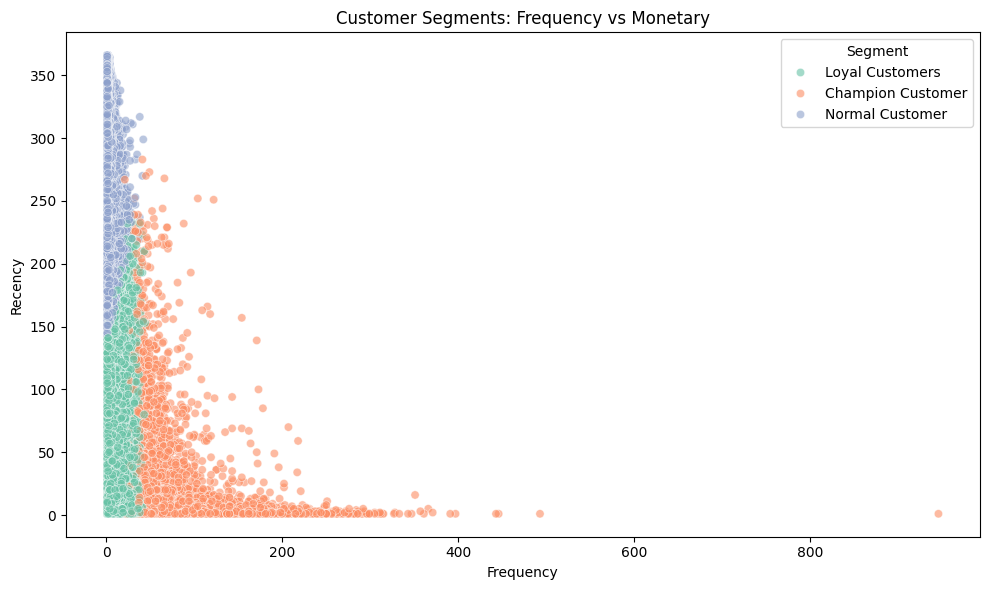

In [28]:
# Scatter: Frequency vs Monetary colored by Segment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Recency', hue='Segment', palette='Set2', alpha=0.6)
plt.title("Customer Segments: Frequency vs Monetary")
plt.tight_layout()
plt.show()


#### Champion Customers (orange):
- Clustered at high frequency and low recency.
- meaning that they buy often and very recently
- this is your most active and valuable group.
- The few champions appear far right indicates very high repeat purchasers, this possibly might be business clients or bulk purchase buyers. 

#### Loyal Customers (green):
- Clustered at medium frequency and moderate recency.
- They buy frequently, but not that consistently as Champion Customer.
- Ideal to nurture and promote upselling.

#### Normal Customers (blue):
- Clustered at low frequency and high recency.
- They haven't purchased in a while and didn’t buy often.
- These are your casual buyers who need reactivation strategies.

#### For Business Strategy Recommend:
- VVIP discount for Champion Group (blue)
- Loyalty Points for Loyal Group (green)
- Exclusive bundle sales or VIP Perks for Normal Customer (orange)

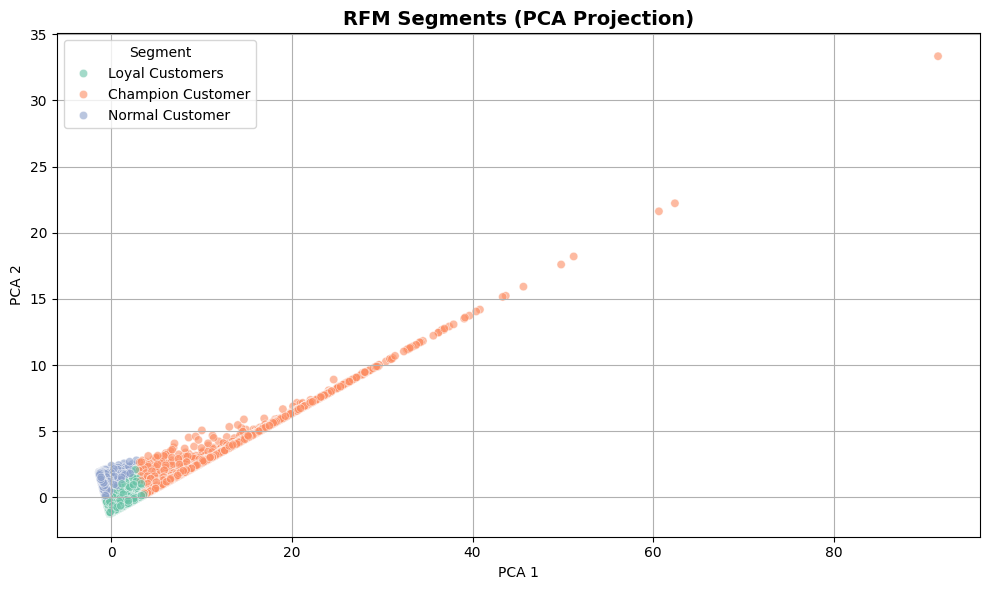

In [29]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_scaled)

rfm['PCA1'] = pca_result[:, 0]
rfm['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Segment', palette='Set2', alpha=0.6)
plt.title("RFM Segments (PCA Projection)", fontsize=14, fontweight='bold')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Segment")
plt.grid(True)
plt.tight_layout()
plt.show()


Champion Customers (orange) are very spread out, especially along the PCA1 axis:
- Suggests high variation in Monetary values within this group (many high spenders).
- Shows segment separation is clear in reduced dimensions.

Loyal Customers (green) and Normal Customers (blue) cluster tighter:
- Less extreme differences within those groups.
- PCA2 likely influenced by Recency + Frequency combo, hence clustering.

Overall shape (diagonal spread) implies that one principal component (PCA1) dominates — likely driven by Monetary values, which tend to have high variance.



## Summary of Findings 
1. Order Patterns

- Order volume increased throughout 2024, with a massive spike in Q4.
- Fridays and weekends showed consistently higher order counts.
- Peak order times occur between 12pm– 3pm, indicating high orders during lunchtime activity, this let us know that it is likely to be a restaurant.

2. Sales Distribution
- Sales amount distribution is right-skewed, with a few very large transactions pulling the average up.
- Most customers generate low to moderate order value.

3. RFM Segmentation

- Using MiniBatch, k=3 was selected based on the elbow method and silhouette score.
- Customers were segmented into three separated groups:

    - Champion Customers: Frequent, recent, and high-spending buyers.
    - Loyal Customers: Regular buyers with moderate spending and moderate recency.
    - Normal Customers (At Risk): Infrequent, inactive, and low-spending.

4. Segment Insights

- Champions generate disproportionately high revenue and are highly engaged.
- Loyal Customers form the backbone of repeat transactions and became the largest group , this can be nurtured.
- Normal Customers contribute the least, ideal for reactivation campaigns.

5. Visualizations

- PCA shows clear separation of clusters, though monetary outliers stretch the Champion cluster.
- Day–hour heatmap confirms strong sales windows for targeted campaign timing.

### Recommendation for Business Application 



- Champion Customers, prioritize with VVIP programs, early access, and exclusive rewards.
- Loyal Customers, offer loyalty perks, upsell recommendations, referral rewards. 
- Normal Customers, run more rentention email campaigns, offer limited-time discounts, come out with bundle sales, focus more on conversion part to let them purchases more frequent and recency. 